# Go-to-Market Exploratory Data Analysis
# Pedram Doroudchi

## The Business Problem

XYZ is a private firm in the US. Due to remarkable growth in the cab industry during the last few years and multiple key players in the market, it is planning to make an investment in the cab industry.

We have been provided with multiple data sets that contain information on 2 cab companies, Pink Cab and Yellow Cab Company. Each file (data set) provided represents different aspects of the customer profile.

## Objective

Provide actionable insights to help XYZ identify the right company in which to invest.

In [1007]:
import pandas as pd

In [1008]:
df1 = pd.read_csv('DataSets/Cab_Data.csv')
print(df1)

        Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2              

In [1009]:
df2 = pd.read_csv('DataSets/Customer_ID.csv')
print(df2)

       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]


In [1010]:
df3 = pd.read_csv('DataSets/Transaction_ID.csv')
print(df3)

        Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]


In [1011]:
df4 = pd.read_csv('DataSets/City.csv')
print(df4)

                City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 


In [1012]:
df5 = df3.merge(df1, on = 'Transaction ID')
print(df5)

        Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10000012        27703         Card           42375    Pink Cab   
2             10000013        28712         Cash           42371    Pink Cab   
3             10000014        28020         Cash           42376    Pink Cab   
4             10000015        27182         Card           42372    Pink Cab   
...                ...          ...          ...             ...         ...   
359387        10440101        52392         Cash           43108  Yellow Cab   
359388        10440104        53286         Cash           43104  Yellow Cab   
359389        10440105        52265         Cash           43105  Yellow Cab   
359390        10440106        52175         Card           43105  Yellow Cab   
359391        10440107        52917         Card           43102  Yellow Cab   

                 City  KM Travelled  Pr

In [1013]:
df6 = df2.merge(df5, on = 'Customer ID')
print(df6)

        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
359387        38520  Female   42               19417        10439790   
359388        12490    Male   33               18713        10439799   
359389        41414    Male   38                3960        10439838   
359390        41677    Male   23               19454        10439840   
359391        39761  Female   32               10128        10439846   

       Payment_Mode  Date of Travel     Company            City  KM Travelled  \
0              Card           42377    Pink Cab      A

In [1014]:
# complete DataFrame
df = df6.merge(df4, on = 'City')
print(df)

        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
359387        51406  Female   29                6829        10307228   
359388        51406  Female   29                6829        10319775   
359389        51406  Female   29                6829        10347676   
359390        51406  Female   29                6829        10358624   
359391        51406  Female   29                6829        10370709   

       Payment_Mode  Date of Travel     Company           City  KM Travelled  \
0              Card           42377    Pink Cab     ATL

In [1015]:
cols = df.columns.tolist()
print(cols)
cols = cols[:9] + cols[12:] + cols[9:12]
df = df[cols]
print(df)

['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID', 'Payment_Mode', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users']
        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
359387        51406  Female   29                6829        10307228   
359388        51406  Female   29                6829        10319775   
359389        51406  Female   29                6829        10347676   
359390        51406  Female   29                6829        10358624   
359391    

In [1016]:
# convert date format from number to datetime type
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], unit = 'd', origin = '1899-12-30')
print(df)

        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
359387        51406  Female   29                6829        10307228   
359388        51406  Female   29                6829        10319775   
359389        51406  Female   29                6829        10347676   
359390        51406  Female   29                6829        10358624   
359391        51406  Female   29                6829        10370709   

       Payment_Mode Date of Travel     Company           City Population  \
0              Card     2016-01-08    Pink Cab     ATLANTA 

In [1017]:
print(df['Date of Travel'].min())

2016-01-02 00:00:00


In [1018]:
print(df['Date of Travel'].max())

2018-12-31 00:00:00


In [1019]:
# convert monthly income to annual income
df['Income (USD/Month)'] = df['Income (USD/Month)'] * 12
df = df.rename(columns = {'Income (USD/Month)':'annual_income_usd'})

In [1020]:
# convert km to mi
df['KM Travelled'] = df['KM Travelled'] * 0.6213711922
df = df.rename(columns = {'KM Travelled':'mi_traveled'})

In [1021]:
# rename other columns
df = df.rename(columns = {'Customer ID':'customer_id',
                          'Gender':'gender',
                          'Age':'age',
                          'Transaction ID':'transaction_id',
                          'Payment_Mode':'payment_mode',
                          'Date of Travel':'date',
                          'Company':'company',
                          'City':'city',
                          'Population':'population',
                          'Users':'users',
                          'Price Charged':'price_charged',
                          'Cost of Trip':'trip_cost'
                          }
               )
print(df)

        customer_id  gender  age  annual_income_usd  transaction_id  \
0             29290    Male   28             129756        10000011   
1             29290    Male   28             129756        10351127   
2             29290    Male   28             129756        10412921   
3             27703    Male   27             110844        10000012   
4             27703    Male   27             110844        10320494   
...             ...     ...  ...                ...             ...   
359387        51406  Female   29              81948        10307228   
359388        51406  Female   29              81948        10319775   
359389        51406  Female   29              81948        10347676   
359390        51406  Female   29              81948        10358624   
359391        51406  Female   29              81948        10370709   

       payment_mode       date     company           city population  \
0              Card 2016-01-08    Pink Cab     ATLANTA GA   814,885    
1  

In [1022]:
# descriptive statistics for each feature column
df.describe(include = 'all', datetime_is_numeric = True)

,customer_id,gender,age,annual_income_usd,transaction_id,payment_mode,date,company,city,population,users,mi_traveled,price_charged,trip_cost
count,359392.000000,359392,359392.000000,359392.000000,3.593920e+05,359392,359392,359392,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,2,19,19,19,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,Card,NaN,Yellow Cab,NEW YORK NY,"8,405,837","302,149",NaN,NaN,NaN
freq,NaN,205912,NaN,NaN,NaN,215504,NaN,274681,99885,99885,99885,NaN,NaN,NaN
mean,19191.652115,NaN,35.336705,180585.875245,1.022076e+07,NaN,2017-08-17 01:37:55.042293504,NaN,NaN,NaN,NaN,14.022642,423.443311,286.190113
min,1.000000,NaN,18.000000,24000.000000,1.000001e+07,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,1.180605,15.600000,19.000000
25%,2705.000000,NaN,25.000000,101088.000000,1.011081e+07,NaN,2016-11-23 00:00:00,NaN,NaN,NaN,NaN,7.456454,206.437500,151.200000
50%,7459.000000,NaN,33.000000,176220.000000,1.022104e+07,NaN,2017-09-10 00:00:00,NaN,NaN,NaN,NaN,13.943570,386.360000,282.480000
75%,36078.000000,NaN,42.000000,252420.000000,1.033094e+07,NaN,2018-05-12 00:00:00,NaN,NaN,NaN,NaN,20.480394,583.660000,413.683200
max,60000.000000,NaN,65.000000,420000.000000,1.044011e+07,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,29.825817,2048.030000,691.200000


It appears that we don't have any missing values among our 359,392 observations of 14 features, which is quite impressive! Outliers seem present with respect to the `price_charged` variable as the 75th percentile is almost 600 while the maximum price charged is over 2,000. Let's examine the highest values of this variable to better understand whether or not this could be a mistake.

In [1023]:
# find number of observations with price charged of at least $1,000
print(df[df['price_charged'] > 1000].shape)

# calculate mean distance traveled of these trips
print(df[df['price_charged'] > 1000]['mi_traveled'].mean())

# calculate max distance traveled of these trips
print(df[df['price_charged'] > 1000]['mi_traveled'].max())

(13582, 14)
24.45406738649581
29.8258172256


We have about 13,500 recorded cab rides with a price charged of over $1,000. This must mean that there is some external variable that caused these rides to be so expensive, like trip duration, since the mean travel distance of these trips is about 24 miles and the maximum travel distance is about 30 miles, not particularly high distances for such expensive fares. Let's now look at the very highest prices charged.

In [1024]:
# find number of observations with price charged of at least $1,000
print(df[df['price_charged'] > 2000].shape)

# calculate mean distance traveled of these trips
print(df[df['price_charged'] > 2000]['mi_traveled'].mean())

# calculate max distance traveled of these trips
print(df[df['price_charged'] > 2000]['mi_traveled'].max())

(3, 14)
27.607522069446002
29.08017179496


There 3 passengers that were charged at least 2,000 and no more than 2,500. These trips had an average distance of about 28 miles and maximum distance of about 29 miles. Having multiple similar extreme values shows that there is likely no mistake and rather there must be an external factor causing such high prices charged. We will hold onto these observations. Let's further analyze the relationships between variables in our DataFrame.

In [1025]:
# create correlation matrix
df.corr()

,customer_id,age,annual_income_usd,transaction_id,mi_traveled,price_charged,trip_cost
customer_id,1.000000,-0.004735,-0.013608,-0.016912,0.000389,-0.177324,0.003077
age,-0.004735,1.000000,0.003907,-0.001267,-0.000369,-0.003084,-0.000189
annual_income_usd,-0.013608,0.003907,1.000000,-0.001570,-0.000544,0.003228,-0.000633
transaction_id,-0.016912,-0.001267,-0.001570,1.000000,-0.001429,-0.052902,-0.003462
mi_traveled,0.000389,-0.000369,-0.000544,-0.001429,1.000000,0.835753,0.981848
price_charged,-0.177324,-0.003084,0.003228,-0.052902,0.835753,1.000000,0.859812
trip_cost,0.003077,-0.000189,-0.000633,-0.003462,0.981848,0.859812,1.000000


Looking at the values in our correlation matrix we observe only a few strong and rather obvious correlations. `price_charged` and `mi_traveled` share a strong positive correlation (~ 0.84) which makes intuitive sense since the longer the trip, the higher the price of the trip. `trip_cost` and `mi_traveled` share a nearly perfect positive correlation (~ 0.98) which makes perfect sense since trip cost is presumably linearly increasing in trip distance. Lastly `trip_cost` and `price_charged` share a strong positive correlation (~ 0.86) since the higher the trip cost, the higher the price that must be charged to cover the cost. Let's look for duplicate values in our DataFrame.

In [1038]:
# find number of duplicate rows
df.duplicated(subset = ['transaction_id']).sum()

0

Looks like there are no duplicate values, nice! The first and most essential question we would like to answer is: "which company appears more profitable on average and what are some attributes of their customers?"

In [1027]:
# create profit variable
df['profit'] = df['price_charged'] - df['trip_cost']
print(df)

# calculate each company's total numebr of rides
print(df['company'].value_counts())

# calculate averages per cab company
df.groupby(['company']).mean()

        customer_id  gender  age  annual_income_usd  transaction_id  \
0             29290    Male   28             129756        10000011   
1             29290    Male   28             129756        10351127   
2             29290    Male   28             129756        10412921   
3             27703    Male   27             110844        10000012   
4             27703    Male   27             110844        10320494   
...             ...     ...  ...                ...             ...   
359387        51406  Female   29              81948        10307228   
359388        51406  Female   29              81948        10319775   
359389        51406  Female   29              81948        10347676   
359390        51406  Female   29              81948        10358624   
359391        51406  Female   29              81948        10370709   

       payment_mode       date     company           city population  \
0              Card 2016-01-08    Pink Cab     ATLANTA GA   814,885    
1  

,customer_id,age,annual_income_usd,transaction_id,mi_traveled,price_charged,trip_cost,profit
company,,,,,,,,
Pink Cab,18422.581577,35.322414,180708.565641,1.022394e+07,14.018082,310.800856,248.148682,62.652174
Yellow Cab,19428.831732,35.341112,180548.037804,1.021978e+07,14.024048,458.181990,297.922004,160.259986


It appears that Yellow Cab is more profitable than Pink Cab by quite some margin. Pink had about 85,000 rides from 2016-2018 while Yellow had about 275,000, over 200% more rides. Both companies had riders with similar average age (~ 35), income (~ 181,000 USD) and distance traveled (~ 14 mi). However, Pink's average profit margin per ride is about 63 USD while Yellow's is about 160, or 150% more. This is despite Yellow having a 20% higher average trip which Yellow accounts for by charging its prices almost 50% higher than Pink Cab. The next question we would like to answer is: "what is the annual profit trend of each company?" 

In [1028]:
grouped = df[['date', 'company', 'profit']].groupby([df.date.dt.year, df.date.dt.quarter, 'company']).sum()
grouped.index.names = ['year', 'quarter', 'company']
grouped.columns = ['total_profit']
print(grouped)

                         total_profit
year quarter company                 
2016 1       Pink Cab    2.492296e+05
             Yellow Cab  2.760242e+06
     2       Pink Cab    2.152461e+05
             Yellow Cab  3.479802e+06
     3       Pink Cab    3.813755e+05
             Yellow Cab  3.197748e+06
     4       Pink Cab    8.676600e+05
             Yellow Cab  4.489204e+06
2017 1       Pink Cab    3.589230e+05
             Yellow Cab  3.602691e+06
     2       Pink Cab    2.567173e+05
             Yellow Cab  3.924204e+06
     3       Pink Cab    4.661954e+05
             Yellow Cab  3.760759e+06
     4       Pink Cab    9.518192e+05
             Yellow Cab  5.288324e+06
2018 1       Pink Cab    3.310399e+05
             Yellow Cab  3.122696e+06
     2       Pink Cab    1.751838e+05
             Yellow Cab  3.235419e+06
     3       Pink Cab    3.370008e+05
             Yellow Cab  2.901709e+06
     4       Pink Cab    7.169376e+05
             Yellow Cab  4.257576e+06


Text(0, 0.5, 'profit (millions USD)')

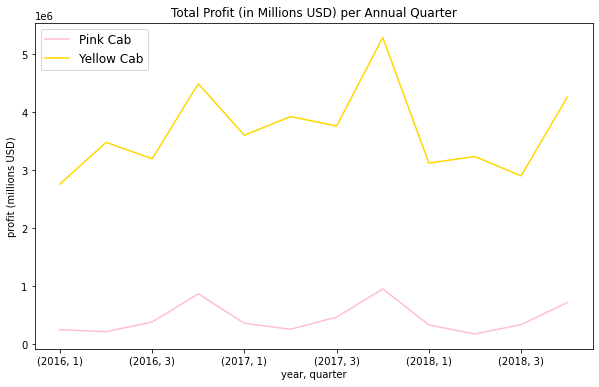

In [1029]:
import matplotlib.pyplot as plt

grouped.unstack().plot(color = ['pink', 'gold'], 
                       figsize = (10, 6),
                       title = 'Total Profit (in Millions USD) per Annual Quarter'
                      )
plt.legend(['Pink Cab', 'Yellow Cab'],
           loc = 'upper left', 
           prop = {'size': 12}
          )
plt.xlabel('year, quarter')
plt.ylabel('profit (millions USD)')

The gap in quarterly profits becomes quite evident looking at the above graph: Yellow Cab earns at least 3 million USD each quarter (except for Q1 2016 and Q3 2018) while Pink Cab consistenly earns less than 1 million USD each quarter. The profit pattern of Yellow Cab displays more variance than that of Pink Cab but both companies display similar seasonal trends with Q1 being weakest and Q4 the strongest financially. Yellow Cab's quarterly profit pattern displays a positive trend from 2016 to 2017 but slightly dips in 2018 while Pink Cab's profit pattern displays a slightly positive trend from 2016 to 2017 and also takes a slight dip in 2018. Perhaps if Pink Cab showed an aggressively positive profit trend towards the level of Yellow Cab then it would be reasonable to consider its investment potential. However, we see no such trend which only lends more credibility to investing in Yellow Cab.

The next question we would like to answer is: "does there appear to be seasonality in the number of customers using each cab service?"

In [1030]:
grouped = df[['date', 'company']].groupby([df.date.dt.year, df.date.dt.quarter, 'company']).count()
grouped.index.names = ['year', 'quarter', 'company']
grouped.columns = ['n_customers']
print(grouped)

                         n_customers
year quarter company                
2016 1       Pink Cab           3208
             Yellow Cab        13539
     2       Pink Cab           4537
             Yellow Cab        16994
     3       Pink Cab           7251
             Yellow Cab        21862
     4       Pink Cab          10084
             Yellow Cab        29844
2017 1       Pink Cab           4432
             Yellow Cab        18031
     2       Pink Cab           5294
             Yellow Cab        19516
     3       Pink Cab           8662
             Yellow Cab        25799
     4       Pink Cab          11933
             Yellow Cab        34843
2018 1       Pink Cab           5015
             Yellow Cab        18902
     2       Pink Cab           5089
             Yellow Cab        18418
     3       Pink Cab           8074
             Yellow Cab        24210
     4       Pink Cab          11132
             Yellow Cab        32723


Text(0, 0.5, 'number of customers')

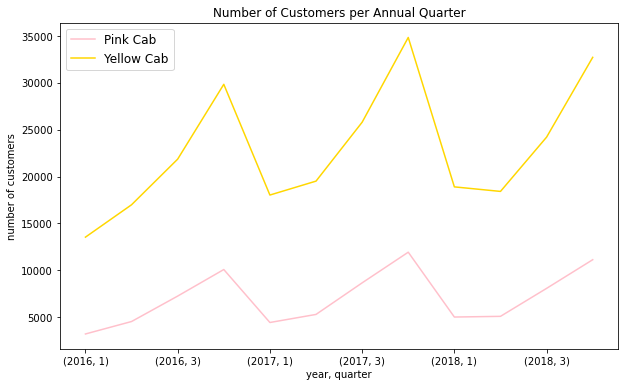

In [1031]:
grouped.unstack().plot(color = ['pink', 'gold'], 
                       figsize = (10, 6),
                       title = 'Number of Customers per Annual Quarter'
                      )
plt.legend(['Pink Cab', 'Yellow Cab'],
           loc = 'upper left', 
           prop = {'size': 12}
          )
plt.xlabel('year, quarter')
plt.ylabel('number of customers')

We see a repeating seasonality trend for both Pink and Yellow Cab. The first annual quarter appears to consistently be the weakest quarter for both companies, seeing a significant drop in customer usage from theimpressive spike in customers during Q4. Second quarter sees a slight improvement in number of customers (except in 2018 for Yellow Cab where the number of customers decreases from Q1 2017). The increase in number of customers during third and fourth quarter appears constant for Pink Cab; while both of these quarters show gains in customer usage for Yellow Cab, there is a noticeably sharp gain during the fourth quarter. Here it becomes quite clear that both companies display similar seasonal trends and that Yellow Cab consistently has more customers than Pink Cab at all times of the year.

The next question we would like to answer is: "which company has more cab users at a particular time period?"

In [1032]:
grouped = df[['date', 'company']].groupby([df.date.dt.day, 'company']).count()
grouped.index.names = ['day', 'company']
grouped.columns = ['n_customers']
print(grouped)

                n_customers
day company                
1   Pink Cab           2875
    Yellow Cab         9079
2   Pink Cab           2664
    Yellow Cab         8702
3   Pink Cab           3124
...                     ...
29  Yellow Cab         8863
30  Pink Cab           2537
    Yellow Cab         8371
31  Pink Cab           1541
    Yellow Cab         5349

[62 rows x 1 columns]


Text(0, 0.5, 'number of customers')

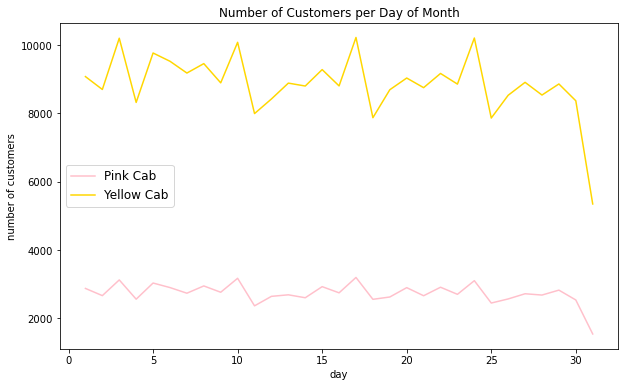

In [1033]:
grouped.unstack().plot(color = ['pink', 'gold'], 
                       figsize = (10, 6),
                       title = 'Number of Customers per Day of Month'
                      )
plt.legend(['Pink Cab', 'Yellow Cab'],
           loc = 'center left', 
           prop = {'size': 12}
          )
plt.ylabel('number of customers')

Comparing daily number of customers between Pink and Yellow Cab, we note some interesting seasonality trends. As expected, Yellow Cab has far more daily customers and a higher variance in number of customers than Pink Cab. Demand for both cab services is highest on the third day of each week and lowest on the following day, the fourth day of each week. Demand plummets for both companies on the last day of each month, but this could be attributed to the fact that only 7 out of 12 months have a 31st day.

Next we would like to answer the question: "how well does each company retain its customers?"

customer_id  company   
1803         Yellow Cab    47
1360         Yellow Cab    47
494          Yellow Cab    47
636          Yellow Cab    46
903          Yellow Cab    45
                           ..
31198        Pink Cab       1
31197        Yellow Cab     1
31194        Yellow Cab     1
31192        Yellow Cab     1
33945        Yellow Cab     1
Length: 72226, dtype: int64


Text(0.5, 0, 'number of rides')

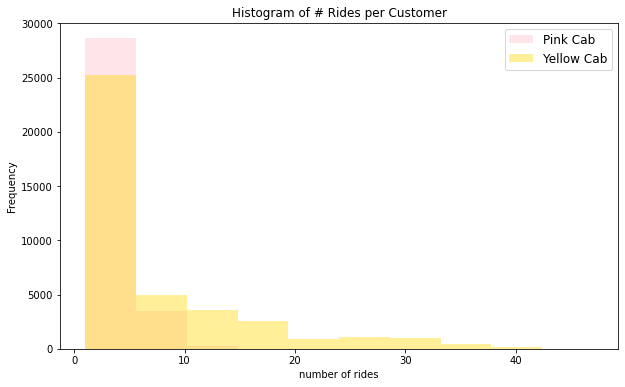

In [1034]:
grouped = df[['customer_id', 'company']].value_counts()
print(grouped)

grouped.unstack().plot(color = ['pink', 'gold'],
                       figsize = (10, 6),
                       kind = 'hist',
                       alpha = 0.4,
                       title = 'Histogram of # Rides per Customer'
                       )
plt.legend(['Pink Cab', 'Yellow Cab'],
           loc = 'upper right', 
           prop = {'size': 12}
          )
plt.xlabel('number of rides')

Looking at the above histogram we note some interesting findings regarding customer retention. Pink Cab has more users who have taken 1-5 rides (~ 29,000 vs 25,000) while Yellow Cab has more customers who have taken 6-10 rides (~ 5,000 vs 4,000) and far more users who have taken more than 10 rides (~ 10,000 vs < 1,000). In fact, Pink Cab has virtually no customers who have taken more than 15 trips with the company. This shows that Yellow Cab does a far better job retaining its customer base, with some customers taking as many as 50 trips and approximately 25% of customers taking more than 10 rides with the company between 2016 & 2018. This alludes to the quality service of Yellow Cab which Pink Cab is not able to match since almost all of its customers took no more than 10 rides during the three-year span.

The last question we would like to examine is: "how do the cab companies compare citywise?"

In [1035]:
print(df)

grouped = df[['customer_id','company', 'city']].groupby(['city', 'company']).count()
grouped.index.names = ['city', 'company']
grouped.columns = ['n_customers']
print(grouped)

        customer_id  gender  age  annual_income_usd  transaction_id  \
0             29290    Male   28             129756        10000011   
1             29290    Male   28             129756        10351127   
2             29290    Male   28             129756        10412921   
3             27703    Male   27             110844        10000012   
4             27703    Male   27             110844        10320494   
...             ...     ...  ...                ...             ...   
359387        51406  Female   29              81948        10307228   
359388        51406  Female   29              81948        10319775   
359389        51406  Female   29              81948        10347676   
359390        51406  Female   29              81948        10358624   
359391        51406  Female   29              81948        10370709   

       payment_mode       date     company           city population  \
0              Card 2016-01-08    Pink Cab     ATLANTA GA   814,885    
1  

Text(0, 0.5, 'number of customers')

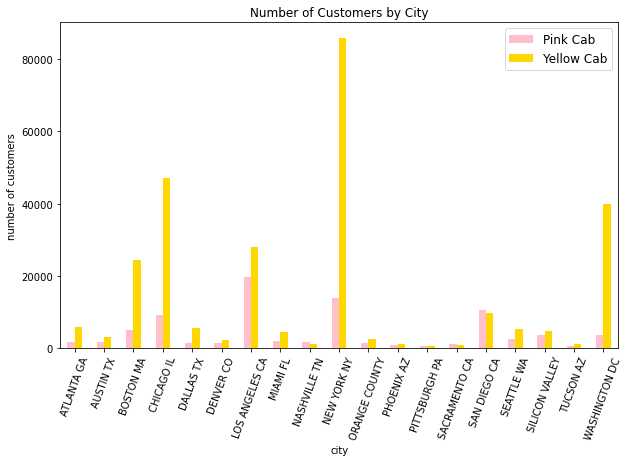

In [1036]:
grouped.unstack().plot.bar(color = ['pink', 'gold'],
                           figsize = (10,6),
                           rot = 70,
                           title = 'Number of Customers by City'
                          )
plt.legend(['Pink Cab', 'Yellow Cab'],
           loc = 'upper right', 
           prop = {'size': 12}
          )
plt.ylabel('number of customers')

We see above that Yellow Cab has far more customers than Pink Cab in almost every city except for Nashville, TN, Pittsburgh, PA, Sacramento, CA, and San Diego, CA, where Pink Cab has slightly more users. Yellow Cab has far more customers in the major population centers of Chicago, IL (~ 47,000 vs 9,000) and New York, NY (~ 86,000 vs 14,000), which has by far the largest population of the cities above (~ 8.4 million). Yellow Cab is also notably superior in cities such as Boston, MA, Los Angeles, CA and Washington, DC. Unfortunately for Pink Cab, it appears that Yellow Cab takes the cake for most customers in major American population centers.

## Conclusion

After our thorough analysis, it is safe to say that Yellow Cab dominates Pink Cab in profits, number of customers and customer retention as we have seen above; these are key indicators of a healthy business, and Yellow Cab displays strong performance within each in spades. Thus it is in XYZ's best interest to invest in the future of Yellow Cab Company.